In [15]:
import numpy as np
from resample.bootstrap import confidence_interval as ci, bootstrap
import matplotlib.pyplot as plt

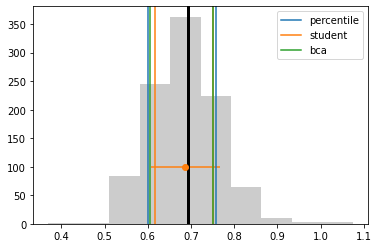

In [281]:
rng = np.random.default_rng(1)
data = rng.exponential(size=100)

rep = bootstrap(np.median, data, 1000, random_state=rng)
cis = {m:ci(np.median, data, 0.68, size=100, ci_method=m, random_state=rng) for m in ("percentile", "student", "bca")}

mr = np.mean(rep)
sr = np.std(rep)
for i, (m, v) in enumerate(cis.items()):
  for j in (0, 1):
    plt.axvline(v[j], color=f"C{i}", label=m if j == 0 else None)
plt.hist(rep, facecolor="0.8")
plt.axvline(np.log(2), lw=3, color="k")
plt.errorbar(mr, 100, 0, sr, fmt="o") 
plt.legend();